In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch08 DNN(딥러닝) MNIST(손글씨데이터)</font>

In [57]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist  # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt  # 학습과정 loss와 acc 시각화

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter = ',', skiprows = 1)
data.shape

(100, 785)

In [4]:
print('타켓 :', data[1,0])
# print('이미지(28 * 28을 1차원으로) :', data[0, 1:].reshape(28, 28))

타켓 : 0.0


In [5]:
for row in data[1, 1:].reshape(28, 28) :
    for pixel in row :
        print('{:3.0f}'.format(pixel), end = '')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

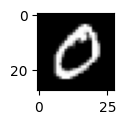

In [6]:
plt.figure(figsize = (1, 1))
plt.imshow(data[1, 1:].reshape(28, 28), cmap = 'gray')

In [7]:
# %pip install opencv-contrib-python

In [8]:
# %pip install opencv-python

In [9]:
# 칼라사진 → 흑백모드의 넘파이 배열로

import cv2
image_gray = cv2.imread('c:/ai_x/source/05_DeepLearning/sample.jpg', cv2.IMREAD_GRAYSCALE)  # 흑백포맷으로 읽기
print(image_gray.shape)
print(type(image_gray))

(281, 500)
<class 'numpy.ndarray'>


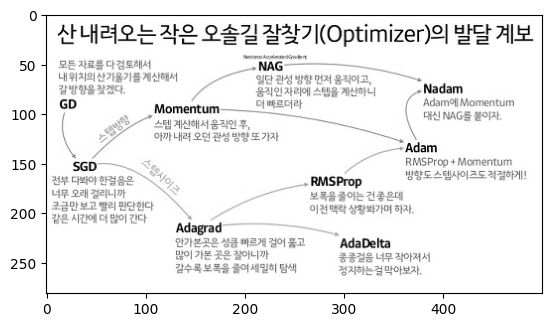

In [10]:
plt.imshow(image_gray, cmap = 'gray')

## 1. 데이터 생성 및 전처리

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
print(y_train[0])
for row in X_train[0] :
    for pixel in row :
        print('{:3.0f}'.format(pixel), end = '')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

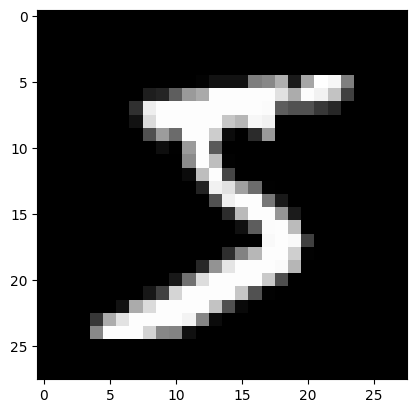

In [13]:
plt.imshow(X_train[0], cmap = 'gray')

In [14]:
# 학습셋(6만개) → 훈련셋(5만개) + 검증셋(1만개)로 분리

X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [15]:
# 학습셋(5만개 : fit용), 검증셋(1만개 : fit용), 테스트셋(1만개 : 평가용)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [16]:
# 입력(독립)변수 (n, 28, 28) → (n, 784) → 실수형변환 → 스케일조정 (255.0으로 나눠)

train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [17]:
# 훈련셋 5만개 → 700개, 검증셋 1만개 → 300개 추출 (목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [24]:
# 타겟(종속)변수의 원핫인코딩

train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[1 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [23]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) → 훈련셋(5만개) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28, 28) → (n, 784) → 실수형변환 → 스케일조정 (255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0

# 훈련셋 5만개 → 700개, 검증셋 1만개 → 300개 추출 (목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

## 2. 모델 구성

In [25]:
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 학습 과정 설정

In [26]:
model.compile(loss = 'categorical_crossentropy',  # sparse_categorical_crossentropy
             optimizer = 'adam',
             metrics = ['accuracy'])

## 4. 모델 학습

In [27]:
%%time

hist = model.fit(train_X, train_Y,
                epochs = 500,
                batch_size = 100,
                validation_data = (val_X, val_Y)
                )

Epoch 1/500
7/7 [==============================] - 1s 32ms/step - loss: 2.2576 - accuracy: 0.1657 - val_loss: 2.2373 - val_accuracy: 0.2400
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2191 - accuracy: 0.2300 - val_loss: 2.2043 - val_accuracy: 0.2700
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1872 - accuracy: 0.2186 - val_loss: 2.1752 - val_accuracy: 0.2300
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1563 - accuracy: 0.2186 - val_loss: 2.1469 - val_accuracy: 0.2267
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1310 - accuracy: 0.2186 - val_loss: 2.1210 - val_accuracy: 0.2433
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1058 - accuracy: 0.2371 - val_loss: 2.1000 - val_accuracy: 0.2533
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.0834 - accuracy: 0.2500 - val_loss: 2.0804 - val_accuracy: 0.2567
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 1.6410 - accuracy: 0.4314 - val_loss: 1.7256 - val_accuracy: 0.4300
Epoch 60/500
7/7 [==============================] - 0s 7ms/step - loss: 1.6366 - accuracy: 0.4343 - val_loss: 1.7263 - val_accuracy: 0.4333
Epoch 61/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6315 - accuracy: 0.4400 - val_loss: 1.7213 - val_accuracy: 0.4267
Epoch 62/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6271 - accuracy: 0.4471 - val_loss: 1.7185 - val_accuracy: 0.4333
Epoch 63/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6229 - accuracy: 0.4457 - val_loss: 1.7157 - val_accuracy: 0.4333
Epoch 64/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6185 - accuracy: 0.4443 - val_loss: 1.7146 - val_accuracy: 0.4267
Epoch 65/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6145 - accuracy: 0.4457 - val_loss: 1.7111 - val_accuracy: 0.4400
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.4464 - accuracy: 0.4871 - val_loss: 1.6327 - val_accuracy: 0.4500
Epoch 118/500
7/7 [==============================] - 0s 7ms/step - loss: 1.4438 - accuracy: 0.4929 - val_loss: 1.6309 - val_accuracy: 0.4500
Epoch 119/500
7/7 [==============================] - 0s 7ms/step - loss: 1.4410 - accuracy: 0.4971 - val_loss: 1.6310 - val_accuracy: 0.4533
Epoch 120/500
7/7 [==============================] - 0s 7ms/step - loss: 1.4386 - accuracy: 0.4943 - val_loss: 1.6303 - val_accuracy: 0.4533
Epoch 121/500
7/7 [==============================] - 0s 7ms/step - loss: 1.4364 - accuracy: 0.4957 - val_loss: 1.6306 - val_accuracy: 0.4600
Epoch 122/500
7/7 [==============================] - 0s 6ms/step - loss: 1.4341 - accuracy: 0.5014 - val_loss: 1.6277 - val_accuracy: 0.4467
Epoch 123/500
7/7 [==============================] - 0s 7ms/step - loss: 1.4308 - accuracy: 0.5029 - val_loss: 1.6273 - val_accuracy: 0.4600
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.3094 - accuracy: 0.5586 - val_loss: 1.5905 - val_accuracy: 0.4500
Epoch 176/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3072 - accuracy: 0.5557 - val_loss: 1.5895 - val_accuracy: 0.4500
Epoch 177/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3050 - accuracy: 0.5586 - val_loss: 1.5890 - val_accuracy: 0.4500
Epoch 178/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3027 - accuracy: 0.5571 - val_loss: 1.5879 - val_accuracy: 0.4567
Epoch 179/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3007 - accuracy: 0.5671 - val_loss: 1.5881 - val_accuracy: 0.4567
Epoch 180/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2987 - accuracy: 0.5629 - val_loss: 1.5875 - val_accuracy: 0.4567
Epoch 181/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2966 - accuracy: 0.5629 - val_loss: 1.5859 - val_accuracy: 0.4567
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.1982 - accuracy: 0.5971 - val_loss: 1.5704 - val_accuracy: 0.4533
Epoch 234/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1969 - accuracy: 0.5957 - val_loss: 1.5705 - val_accuracy: 0.4567
Epoch 235/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1951 - accuracy: 0.5971 - val_loss: 1.5700 - val_accuracy: 0.4633
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1931 - accuracy: 0.5971 - val_loss: 1.5688 - val_accuracy: 0.4667
Epoch 237/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1911 - accuracy: 0.5971 - val_loss: 1.5685 - val_accuracy: 0.4567
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1895 - accuracy: 0.6000 - val_loss: 1.5675 - val_accuracy: 0.4667
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1879 - accuracy: 0.5986 - val_loss: 1.5679 - val_accuracy: 0.4667
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.1043 - accuracy: 0.6371 - val_loss: 1.5699 - val_accuracy: 0.4700
Epoch 292/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1032 - accuracy: 0.6386 - val_loss: 1.5695 - val_accuracy: 0.4700
Epoch 293/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1015 - accuracy: 0.6400 - val_loss: 1.5693 - val_accuracy: 0.4767
Epoch 294/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1005 - accuracy: 0.6343 - val_loss: 1.5698 - val_accuracy: 0.4800
Epoch 295/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0990 - accuracy: 0.6386 - val_loss: 1.5711 - val_accuracy: 0.4800
Epoch 296/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0974 - accuracy: 0.6371 - val_loss: 1.5713 - val_accuracy: 0.4700
Epoch 297/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0958 - accuracy: 0.6371 - val_loss: 1.5711 - val_accuracy: 0.4733
Epoch 298/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.0229 - accuracy: 0.6614 - val_loss: 1.5927 - val_accuracy: 0.4700
Epoch 350/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0213 - accuracy: 0.6614 - val_loss: 1.5914 - val_accuracy: 0.4667
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0203 - accuracy: 0.6600 - val_loss: 1.5922 - val_accuracy: 0.4633
Epoch 352/500
7/7 [==============================] - 0s 8ms/step - loss: 1.0197 - accuracy: 0.6614 - val_loss: 1.5925 - val_accuracy: 0.4667
Epoch 353/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0183 - accuracy: 0.6586 - val_loss: 1.5920 - val_accuracy: 0.4767
Epoch 354/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0168 - accuracy: 0.6614 - val_loss: 1.5934 - val_accuracy: 0.4733
Epoch 355/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0143 - accuracy: 0.6686 - val_loss: 1.5923 - val_accuracy: 0.4633
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.9459 - accuracy: 0.6900 - val_loss: 1.6368 - val_accuracy: 0.4800
Epoch 408/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9446 - accuracy: 0.6886 - val_loss: 1.6339 - val_accuracy: 0.4733
Epoch 409/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9443 - accuracy: 0.6914 - val_loss: 1.6367 - val_accuracy: 0.4767
Epoch 410/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9441 - accuracy: 0.6857 - val_loss: 1.6396 - val_accuracy: 0.4733
Epoch 411/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9425 - accuracy: 0.6971 - val_loss: 1.6352 - val_accuracy: 0.4800
Epoch 412/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9415 - accuracy: 0.6943 - val_loss: 1.6404 - val_accuracy: 0.4733
Epoch 413/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9400 - accuracy: 0.6914 - val_loss: 1.6384 - val_accuracy: 0.4767
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.8931 - accuracy: 0.7129 - val_loss: 1.6996 - val_accuracy: 0.4900
Epoch 466/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8927 - accuracy: 0.7143 - val_loss: 1.7019 - val_accuracy: 0.4800
Epoch 467/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - accuracy: 0.7100 - val_loss: 1.7022 - val_accuracy: 0.4800
Epoch 468/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8898 - accuracy: 0.7057 - val_loss: 1.7068 - val_accuracy: 0.4833
Epoch 469/500
7/7 [==============================] - 0s 8ms/step - loss: 0.8894 - accuracy: 0.7143 - val_loss: 1.7049 - val_accuracy: 0.4800
Epoch 470/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8886 - accuracy: 0.7129 - val_loss: 1.7077 - val_accuracy: 0.4833
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8895 - accuracy: 0.7129 - val_loss: 1.7056 - val_accuracy: 0.4833
Epoch 472/500
7/7 [========

In [28]:
# 학습 과정 살펴보기

hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

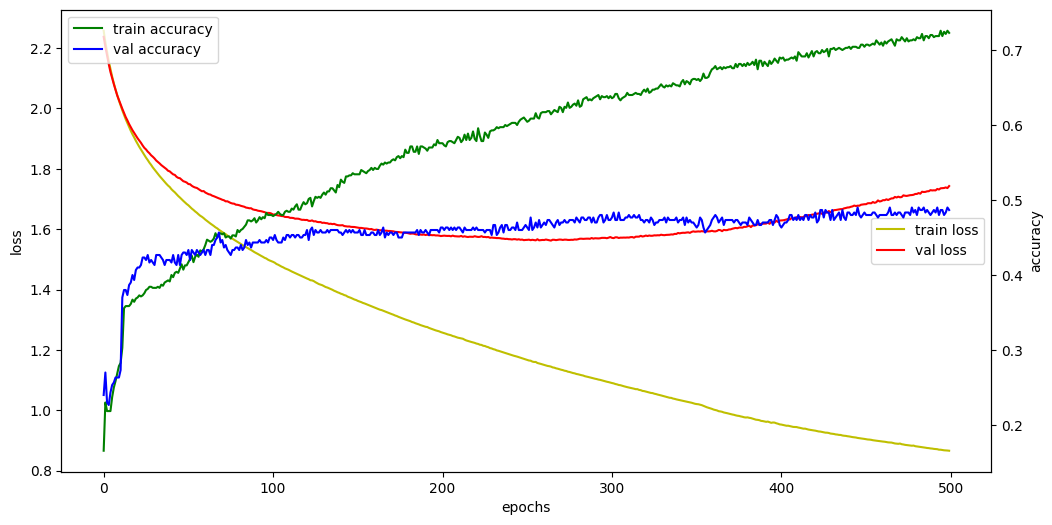

In [29]:
fig, loss_ax = plt.subplots(figsize = (12, 6))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend()
plt.show()

In [30]:
# 모델 평가하기

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size = 100, verbose = 0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.638266921043396
accuracy : 0.49390000104904175


# ※ 위 모델(DNN)의 accuracy 늘리기

- 데이터 확보
- 모델 수정 (레이어 추가, units수 증가)
- 과적합 방지 (validation data추가, dropout, 활성화함수 relu계열, tanh)
- epoch 조정
- optimizer 변경

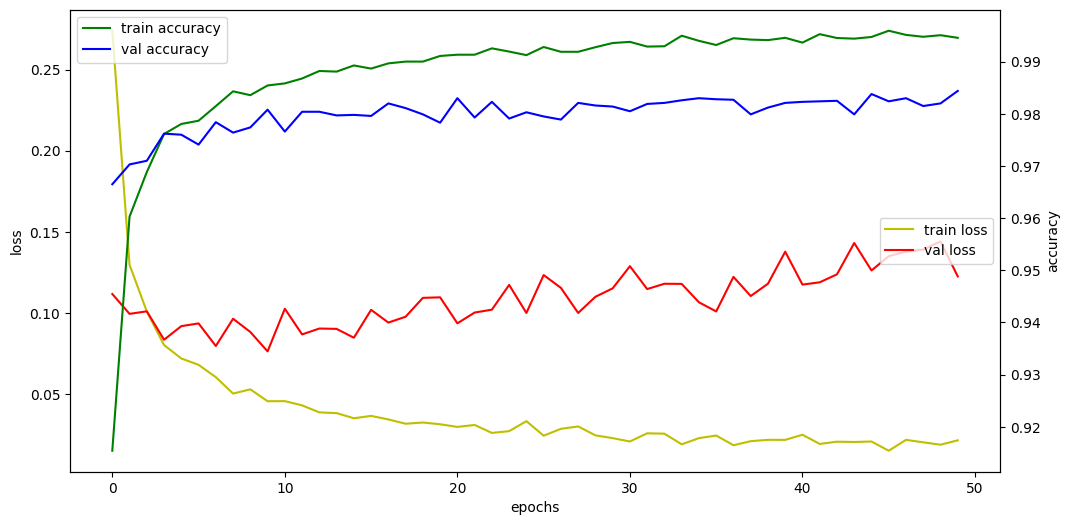

CPU times: total: 26min 45s
Wall time: 5min 43s


In [35]:
%%time

# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) → 훈련셋(5만개) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28, 28) → (n, 784) → 실수형변환 → 스케일조정 (255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0

# 훈련셋 5만개 → 700개, 검증셋 1만개 → 300개 추출 (목적 : 학습시간 절약), 테스트셋은 그대로
# train_idx = np.random.choice(50000, 700)
# val_idx = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X = val_X[val_idx]
# y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

# 모델 생성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 512, activation = 'elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'softmax'))

# 학습 과정 설정
model.compile(loss = 'categorical_crossentropy',  # sparse_categorical_crossentropy
             optimizer = 'adam',
             metrics = ['accuracy'])

# 학습
hist = model.fit(train_X, train_Y,
                epochs = 50,
                batch_size = 100,
                validation_data = (val_X, val_Y),
                verbose = 0)

# 그래프 그리기
fig, loss_ax = plt.subplots(figsize = (12, 6))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend()
plt.show()

In [37]:
# 모델 평가하기

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size = 100, verbose = 0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.10377955436706543
accuracy : 0.984000027179718


In [38]:
# 실제값

test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
# 예측값

yhat = model.predict(test_X).argmax(axis = 1)
yhat = np.argmax(model.predict(test_X), axis = 1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,0,1,0,0,2,0,2,1
1,0,1127,2,1,0,0,2,0,3,0
2,3,0,1018,3,1,0,0,5,2,0
3,0,0,3,984,0,8,0,4,7,4
4,1,0,2,0,961,0,4,1,1,12
5,3,0,0,4,1,874,4,0,4,2
6,3,2,0,0,1,3,947,0,2,0
7,0,1,7,1,0,0,0,1013,3,3
8,0,1,4,3,0,3,1,3,954,5


In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[ 973,    1,    0,    1,    0,    0,    2,    0,    2,    1],
       [   0, 1127,    2,    1,    0,    0,    2,    0,    3,    0],
       [   3,    0, 1018,    3,    1,    0,    0,    5,    2,    0],
       [   0,    0,    3,  984,    0,    8,    0,    4,    7,    4],
       [   1,    0,    2,    0,  961,    0,    4,    1,    1,   12],
       [   3,    0,    0,    4,    1,  874,    4,    0,    4,    2],
       [   3,    2,    0,    0,    1,    3,  947,    0,    2,    0],
       [   0,    1,    7,    1,    0,    0,    0, 1013,    3,    3],
       [   0,    1,    4,    3,    0,    3,    1,    3,  954,    5],
       [   2,    3,    0,    6,    4,    4,    0,    1,    0,  989]],
      dtype=int64)

In [43]:
# 틀린 갯수 :

10000 - 10000 * loss_and_metrics[1]

159.99972820281982

In [44]:
cnt = 0
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 160


In [45]:
# 모델 저장

model.save('model/08_mnist.h5')

# 콜백함수 1 : 로그 출력

In [46]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [51]:
%%time

# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback) :
    def __init__(self) :  # 생성자함수
        self.epoch = 0
        
    def on_epoch_end(self, batch, logs = {}) :  # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch값을 1씩 증가
        if self.epoch % 10 == 0 :
            print('epoch : {}, loss : {}, acc : {}, val_loss : {}, val_acc : {}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                  )
            )


# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋(6만개) → 훈련셋(5만개) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립)변수 (n, 28, 28) → (n, 784) → 실수형변환 → 스케일조정 (255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0

# 훈련셋 5만개 → 700개, 검증셋 1만개 → 300개 추출 (목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

# 모델 생성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 학습 과정 설정
model.compile(loss = 'categorical_crossentropy',  # sparse_categorical_crossentropy
             optimizer = 'adam',
             metrics = ['accuracy'])

# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs = 50,
                batch_size = 100,
                validation_data = (val_X, val_Y),
                verbose = 0,
                callbacks = [customHistory])  # 콜백함수

epoch : 10, loss : 2.1427531242370605, acc : 0.2257142812013626, val_loss : 2.142949104309082, val_acc : 0.23333333432674408
epoch : 20, loss : 1.9854212999343872, acc : 0.28999999165534973, val_loss : 1.9863911867141724, val_acc : 0.2933333218097687
epoch : 30, loss : 1.8581502437591553, acc : 0.35857143998146057, val_loss : 1.8659268617630005, val_acc : 0.36000001430511475
epoch : 40, loss : 1.7581944465637207, acc : 0.4000000059604645, val_loss : 1.7809045314788818, val_acc : 0.3866666555404663
epoch : 50, loss : 1.6834821701049805, acc : 0.41999998688697815, val_loss : 1.7215627431869507, val_acc : 0.39666667580604553
CPU times: total: 3.2 s
Wall time: 2.55 s


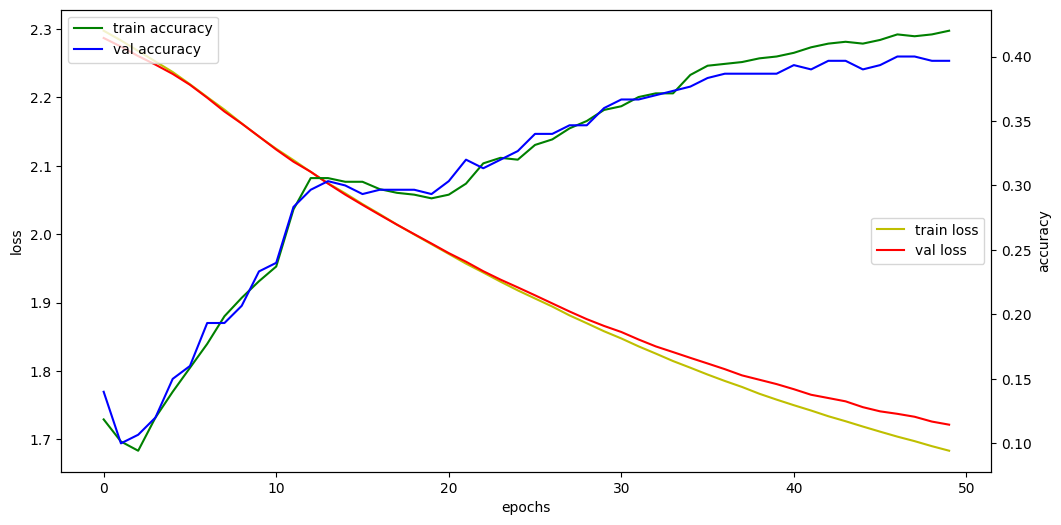

In [52]:
# 그래프 그리기

fig, loss_ax = plt.subplots(figsize = (12, 6))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend()
plt.show()

# 콜백함수 2 : EarlyStopping

- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [53]:
# 모델 생성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 학습 과정 설정
model.compile(loss = 'categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer = 'nadam',
             metrics = ['accuracy'])

# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor = 'val_accuracy', patience = 2) 
hist = model.fit(train_X, train_Y,
                epochs = 500,
                batch_size = 100,
                validation_data = (val_X, val_Y),
                verbose = 1,
                callbacks = [earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 24ms/step - loss: 2.3080 - accuracy: 0.1814 - val_loss: 2.2518 - val_accuracy: 0.2133
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2601 - accuracy: 0.2229 - val_loss: 2.2215 - val_accuracy: 0.2367
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2280 - accuracy: 0.2400 - val_loss: 2.1909 - val_accuracy: 0.2567
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1960 - accuracy: 0.2500 - val_loss: 2.1601 - val_accuracy: 0.2600
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1663 - accuracy: 0.2600 - val_loss: 2.1310 - val_accuracy: 0.2700
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1390 - accuracy: 0.2586 - val_loss: 2.1054 - val_accuracy: 0.2667
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1142 - accuracy: 0.2614 - val_loss: 2.0838 - val_accuracy: 0.2733
Epoch 8/500
7/7 [=========

# 콜백함수 3 : ModelCheckpoint

- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [55]:
# 모델 생성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 학습 과정 설정
model.compile(loss = 'categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer = 'nadam',
             metrics = ['accuracy'])

# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor = 'val_accuracy', patience = 10)

# 모델 자동 저장 콜백
import os

model_save_folder = './model08/'
if not os.path.exists(model_save_folder) :  # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath = file, 
                            monitor = 'val_accuracy',  # 모리터할 지표
                            save_best_only = True,  # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max',  # 값이 클수록 저장
                            verbose = 1  # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs = 500,
                batch_size = 100,
                validation_data = (val_X, val_Y),
                verbose = 1,
                callbacks = [earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 23ms/step - loss: 2.2960 - accuracy: 0.0714 - val_loss: 2.2779 - val_accuracy: 0.1300
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2741 - accuracy: 0.1314 - val_loss: 2.2597 - val_accuracy: 0.1600
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2509 - accuracy: 0.1371 - val_loss: 2.2342 - val_accuracy: 0.1567
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2239 - accuracy: 0.1443 - val_loss: 2.2049 - val_accuracy: 0.1700
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1972 - accuracy: 0.1443 - val_loss: 2.1811 - val_accuracy: 0.1700
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1704 - accuracy: 0.1671 - val_loss: 2.1512 - val_accuracy: 0.1733
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1440 - accuracy: 0.1600 - val_loss: 2.1277 - val_accuracy: 0.1933
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 8ms/step - loss: 1.5981 - accuracy: 0.4000 - val_loss: 1.6292 - val_accuracy: 0.3600
Epoch 60/500
7/7 [==============================] - 0s 8ms/step - loss: 1.5930 - accuracy: 0.3971 - val_loss: 1.6259 - val_accuracy: 0.3733


In [56]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 1.6259 - accuracy: 0.3733


[1.625872254371643, 0.3733333349227905]